# Proyecto

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression, datasets
from sklearn import datasets

In [9]:
data = np.load('proyecto_training_data.npy')
training_data_percent = 80
test_data_percent = 100-training_data_percent
training_data_samples = int(data.shape[0] * (training_data_percent*0.01))
random_indexes = np.random.choice(data.shape[0], size=training_data_samples, replace=False)
training_data = data[random_indexes,:]
test_data = np.delete(data,random_indexes,axis=0)

In [10]:
df = pd.DataFrame(training_data, columns = ['SalePrice','OverallQuality','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [205]:
df.describe()

,SalePrice,OverallQuality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,964.000000
mean,181825.924658,6.103596,1173.047945,6.539384,1971.235445,70.491701
std,81131.433662,1.388058,392.711366,1.616164,30.159619,24.491441
min,34900.000000,1.000000,438.000000,3.000000,1872.000000,21.000000
25%,129500.000000,5.000000,892.000000,5.000000,1954.000000,60.000000
50%,162950.000000,6.000000,1092.000000,6.000000,1972.500000,70.000000
75%,215000.000000,7.000000,1411.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [12]:
sale_price = df['SalePrice']
overall_qlt = df['OverallQuality']
fl_sqft = df['1stFlrSF']
rooms_above_grade = df['TotRmsAbvGrd']
year_built = df['YearBuilt']
linear_ftstreet = df['LotFrontage']
#sale_price_sorted = sale_price.sort_values(ascending=True)
#sale_price_sorted

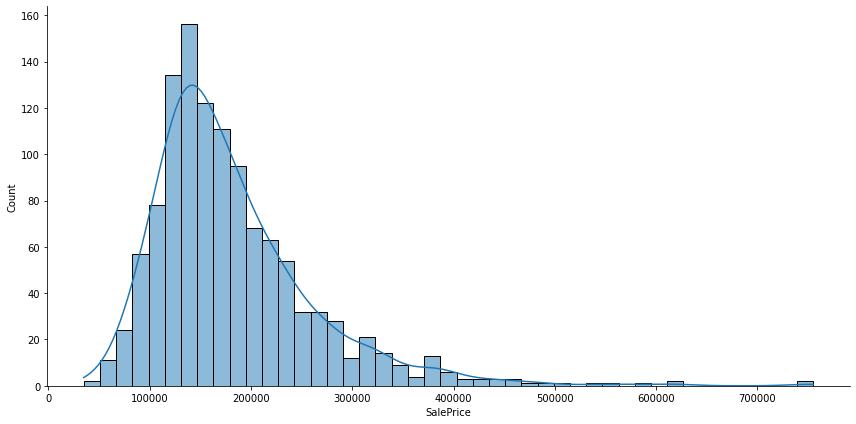

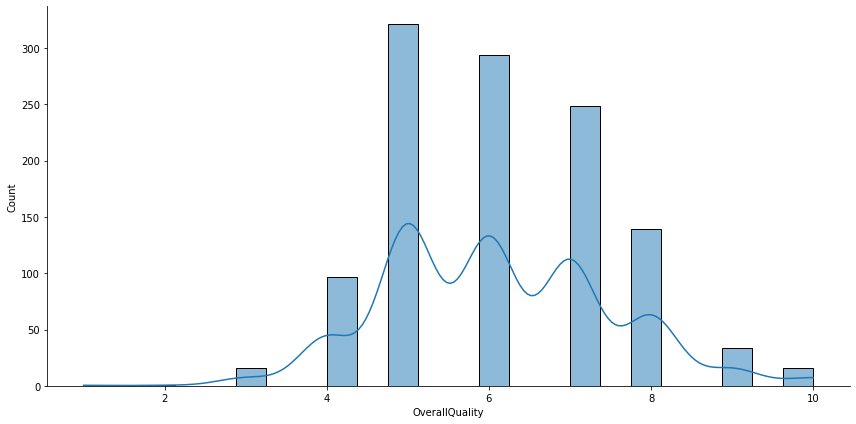

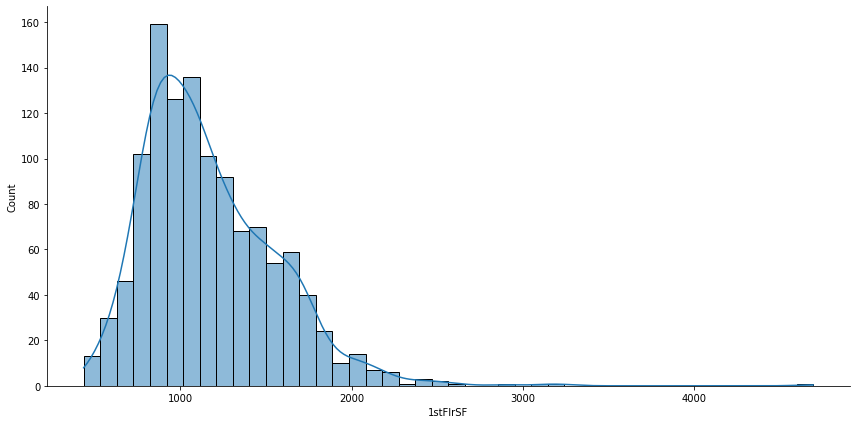

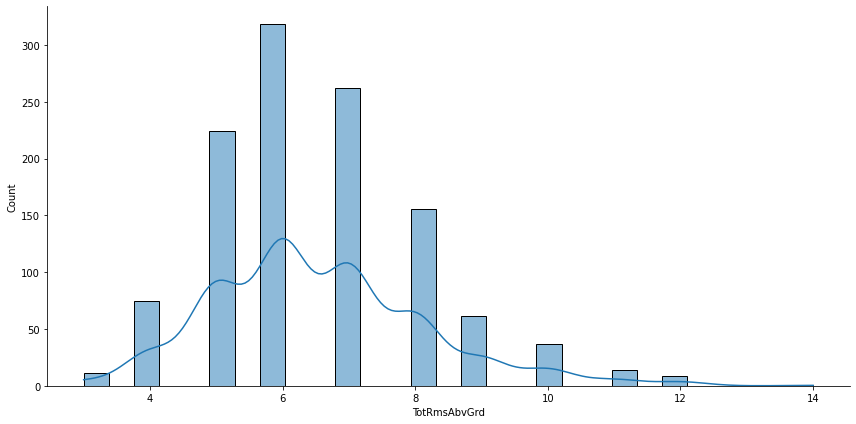

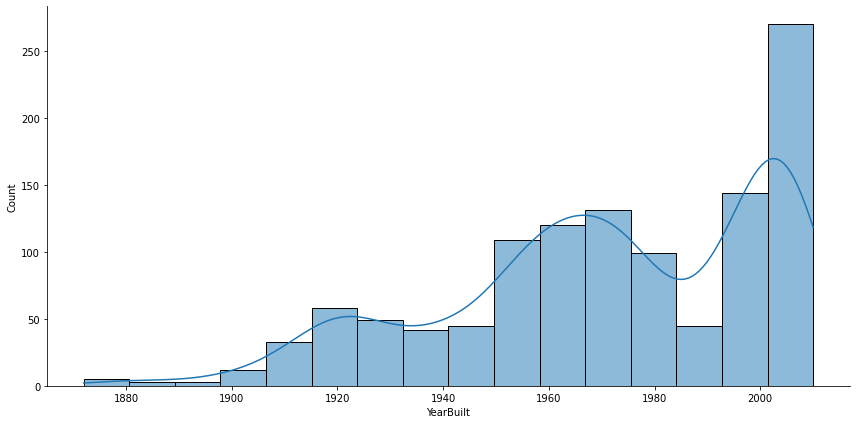

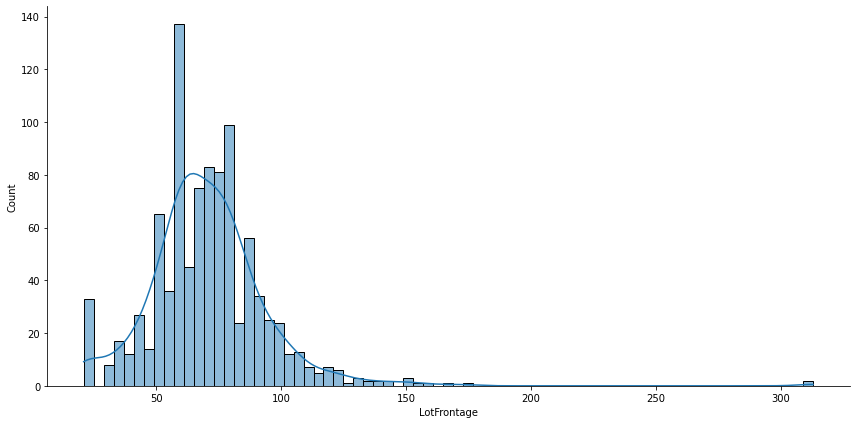

In [13]:
sns.displot(df['SalePrice'], kde=True,height=6, aspect=2,)
sns.displot(df['OverallQuality'], kde=True,height=6, aspect=2,)
sns.displot(df['1stFlrSF'], kde=True,height=6, aspect=2,)
sns.displot(df['TotRmsAbvGrd'], kde=True,height=6, aspect=2,)
sns.displot(df['YearBuilt'], kde=True,height=6, aspect=2,)
sns.displot(df['LotFrontage'], kde=True,height=6, aspect=2,)

In [207]:
corr_p_oq = df['SalePrice'].corr(df['OverallQuality'])
corr_p_oq

0.7894746670496785

In [15]:
corr_p_sf = df['SalePrice'].corr(df['1stFlrSF'])
corr_p_sf

0.5907326854924124

In [16]:
corr_p_rooms = df['SalePrice'].corr(df['TotRmsAbvGrd'])
corr_p_rooms

0.5448101520178038

In [17]:
corr_p_yearb = df['SalePrice'].corr(df['YearBuilt'])
corr_p_yearb

0.520769127010598

In [18]:
corr_p_lfst = df['SalePrice'].corr(df['LotFrontage'])
corr_p_lfst

0.34535741592720964

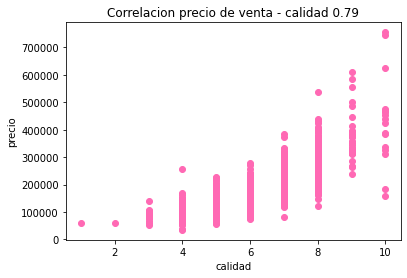

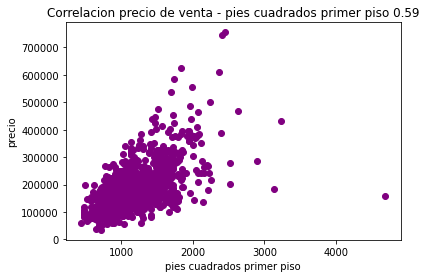

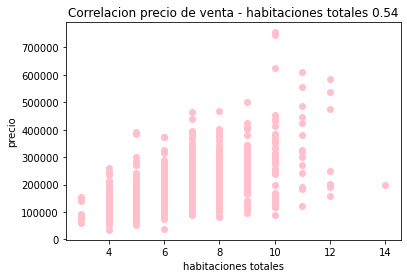

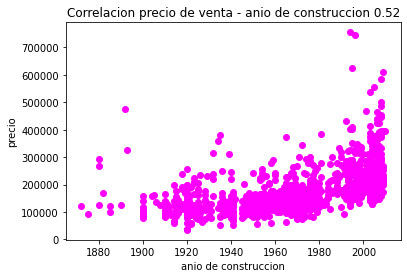

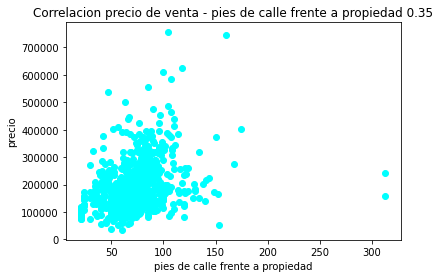

In [19]:
plt.scatter(df['OverallQuality'], df['SalePrice'], color = 'hotpink')
plt.title("Correlacion precio de venta - calidad " + str("%.2f" % corr_p_oq))
plt.xlabel("calidad")
plt.ylabel("precio")
plt.show()
plt.scatter(df['1stFlrSF'], df['SalePrice'], color = 'purple')
plt.title("Correlacion precio de venta - pies cuadrados primer piso " + str("%.2f" % corr_p_sf))
plt.xlabel("pies cuadrados primer piso")
plt.ylabel("precio")
plt.show()
plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'], color = 'pink')
plt.title("Correlacion precio de venta - habitaciones totales " + str("%.2f" % corr_p_rooms))
plt.xlabel("habitaciones totales")
plt.ylabel("precio")
plt.show()
plt.scatter(df['YearBuilt'], df['SalePrice'], color = 'magenta')
plt.title("Correlacion precio de venta - anio de construccion " + str("%.2f" % corr_p_yearb))
plt.xlabel("anio de construccion")
plt.ylabel("precio")
plt.show()
plt.scatter(df['LotFrontage'], df['SalePrice'], color = 'cyan')
plt.title("Correlacion precio de venta - pies de calle frente a propiedad " + str("%.2f" % corr_p_lfst))
plt.xlabel("pies de calle frente a propiedad")
plt.ylabel("precio")
plt.show()

In [220]:
def model_training(vector_x,vector_y, epochs, learning_rate):
    n = len(vector_x)
    zx = np.ones(n)
    mat = np.array([vector_x.astype(object),zx.astype(object)]).transpose()
    global betas
    betas = np.array([3,9])
    #betas = np.array([3,9])
    betas_gradient = np.array([1,1])
    epoch_counter = 0
    error_vector = np.array([])
    results_vector = np.array([])
    #results_vector = []
    results = {}
    while epoch_counter < epochs:
        y_hat = np.dot(mat,betas)
        t1 = [(a-b)**2 for a,b in zip(vector_y,y_hat)]
        error = (1/(2*n))*(sum(t1))
        error_vector = np.append(error_vector,error)
        yh_minus_y = y_hat - vector_y
        yh_minus_y_mat = np.array([yh_minus_y,yh_minus_y])
        res = np.multiply(mat.transpose(),yh_minus_y_mat).transpose()
        betas_gradient = np.sum((res/n),axis=0)
        betas[0] = betas[0] - (learning_rate * betas_gradient[1])
        betas[1] = betas[1] - (learning_rate * betas_gradient[0])
        results_vector = np.append(results_vector,betas)
        epoch_counter += 1
    #for k in range(epoch_counter):
        #results[k] = results_vector[k] 
    rr = results_vector.reshape(int(results_vector.shape[0]/2),2)
    print(y_hat)
    counter = 0
    for items in rr:
        counter += 1
        results[counter] = items
    return error_vector, results

In [221]:
errors, modelres = model_training(df['1stFlrSF'].to_numpy(),df['SalePrice'].to_numpy(),100,0.00001)
#matrix,errors, res = model_training(df['1stFlrSF'].to_numpy(),df['SalePrice'].to_numpy(),50,0.0001)

[132967.0 137287.0 145627.0 ... 148777.0 134017.0 144757.0]


In [213]:
def graph_error(error_vect):
    plt.scatter(np.arange(1, len(error_vect)+1, 1), error_vect, color = 'hotpink')
    plt.title("Correlacion precio de venta - calidad ")
    plt.xlabel("iteracion")
    plt.ylabel("error")
    plt.show()

In [219]:
rr

NameError: name 'rr' is not defined

In [215]:
modelres

{1: array([   4., 2283.]),
 2: array([   5., 4515.]),
 3: array([6.000e+00, 6.706e+03]),
 4: array([7.000e+00, 8.856e+03]),
 5: array([8.0000e+00, 1.0965e+04]),
 6: array([9.0000e+00, 1.3034e+04]),
 7: array([1.0000e+01, 1.5064e+04]),
 8: array([1.1000e+01, 1.7055e+04]),
 9: array([1.2000e+01, 1.9007e+04]),
 10: array([1.3000e+01, 2.0921e+04]),
 11: array([1.4000e+01, 2.2797e+04]),
 12: array([1.5000e+01, 2.4636e+04]),
 13: array([1.6000e+01, 2.6438e+04]),
 14: array([1.7000e+01, 2.8204e+04]),
 15: array([1.8000e+01, 2.9933e+04]),
 16: array([1.9000e+01, 3.1627e+04]),
 17: array([2.0000e+01, 3.3286e+04]),
 18: array([2.100e+01, 3.491e+04]),
 19: array([2.20e+01, 3.65e+04]),
 20: array([2.3000e+01, 3.8056e+04]),
 21: array([2.4000e+01, 3.9578e+04]),
 22: array([2.5000e+01, 4.1067e+04]),
 23: array([2.6000e+01, 4.2523e+04]),
 24: array([2.7000e+01, 4.3947e+04]),
 25: array([2.8000e+01, 4.5339e+04]),
 26: array([2.9000e+01, 4.6699e+04]),
 27: array([3.0000e+01, 4.8028e+04]),
 28: array([3

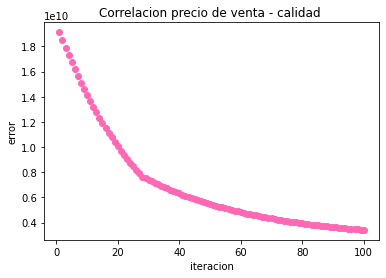

In [216]:
graph_error(errors)

In [217]:
def graph_model_evolution(modeldict):
    x = np.linspace(0,100,100)
    counter = 0
    colors = ['red','blue','green','orange']
    for key in modeldict:
        y = modeldict[key][0]*x+modeldict[key][1]
        plt.plot(x, y, '-r', label='modelo '+str(key), color=colors[counter])
        plt.title('Modelo')
        plt.xlabel('x', color='#1C2835')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        if (counter == len(colors)-1):
            counter = 0
        else:
            counter += 1
    plt.grid()
    plt.show()

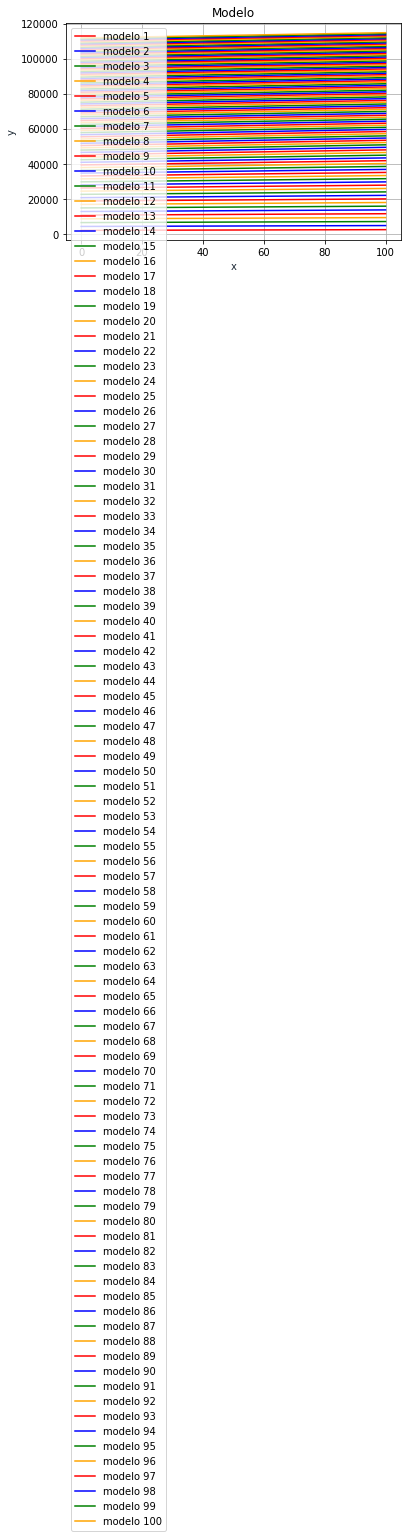

In [218]:
graph_model_evolution(modelres)

In [192]:
var = df['1stFlrSF'].to_numpy().reshape(-1, 1)
var

array([[ 720.],
       [ 864.],
       [1142.],
       ...,
       [1247.],
       [ 755.],
       [1113.]])

In [193]:
reg = LinearRegression().fit(var,df['SalePrice'].to_numpy())

In [194]:
print(reg.intercept_)

38665.676132121036


In [195]:
print(reg.coef_)
print(reg.intercept_)

[122.04125936]


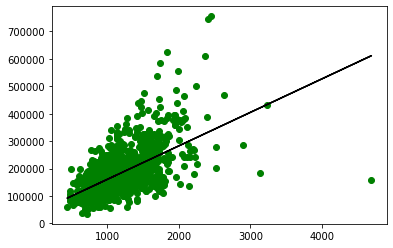

In [196]:
plt.scatter(var, df['SalePrice'].to_numpy() ,color='g')
plt.plot(var, reg.predict(var),color='k')
plt.show()

In [197]:
var

array([[ 720.],
       [ 864.],
       [1142.],
       ...,
       [1247.],
       [ 755.],
       [1113.]])

In [200]:
vartest = dftest['1stFlrSF'].to_numpy().reshape(-1, 1)

In [201]:
y_pred = reg.predict(vartest)
dfres = pd.DataFrame({'Actual': dftest['SalePrice'], 'Predicted': y_pred})
dfres

,Actual,Predicted
0,181500.0,192681.745448
1,140000.0,155947.326379
2,307000.0,245403.569492
3,200000.0,173765.350246
4,129900.0,163391.843201
...,...,...
287,149300.0,142156.664071
288,179600.0,212208.346946
289,157900.0,183650.692255
290,84500.0,177792.711805
